In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Merged_GNSS_and_SNR_HKLM.csv'
gnss_data = pd.read_csv(file_path)

# Convert 'TIME' column to datetime and specify dayfirst=True to handle the format
gnss_data['TIME'] = pd.to_datetime(gnss_data['TIME'], dayfirst=True)
gnss_data['Time_seconds'] = (gnss_data['TIME'] - gnss_data['TIME'].min()).dt.total_seconds()

# Define features (including time) and target variable
features = ['Time_seconds', 'Phase (m)', 'STD of Pseudorange L1 (m)', 'STD of Pseudorange L2 (m)',
            'Elevation', 'Azimuth', 'SNR(dBHz)', 'L1 MP(m)']
target = 'Pseudorange Residual (m)'

# Drop rows with missing values
gnss_data_clean = gnss_data.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = gnss_data_clean[features]
y = gnss_data_clean[target]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets, maintaining time-based order
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Random Forest

RMS of Original Pseudorange Residual (M_original): 0.6352 meters
RMS after model prediction (M_m): 0.3928 meters
Improvement Rate: 38.16%


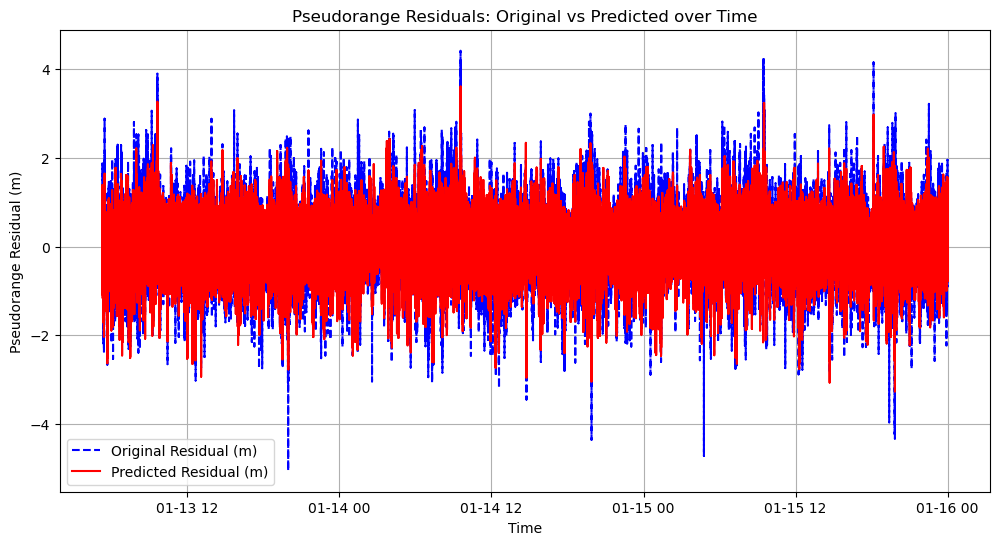

In [2]:
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the pseudorange residuals
y_pred = rf_model.predict(X_test)

# Calculate RMS for the original and model-predicted residuals
a1 = np.sqrt(mean_squared_error(y_test, np.zeros_like(y_test)))  # RMS of original data
a2 = np.sqrt(mean_squared_error(y_test, y_pred))  # RMS after model prediction

# Calculate improvement rate
improvement_rate = (a1 - a2) / a1

# Print the results
print(f'RMS of Original Pseudorange Residual (M_original): {a1:.4f} meters')
print(f'RMS after model prediction (M_m): {a2:.4f} meters')
print(f'Improvement Rate: {improvement_rate * 100:.2f}%')

# Plot the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred):], y_pred, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()

# FCNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 238us/step - loss: 0.2234
Epoch 2/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step - loss: 0.2062
Epoch 3/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.2022
Epoch 4/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step - loss: 0.1979
Epoch 5/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 235us/step - loss: 0.1969
Epoch 6/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 243us/step - loss: 0.1943
Epoch 7/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 240us/step - loss: 0.1948
Epoch 8/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 246us/step - loss: 0.1923
Epoch 9/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.1922
Epoch 10/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 246us/step - loss: 0.1915
Epoch 11/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 245us/step - loss: 0.1883
Epoch 12/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 243us/step - loss: 0.1896
Epoch 13/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 247us/step - loss: 0.1881
Epoch 14/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 2s 242us/step - loss: 0.1877
Epoch 15/50


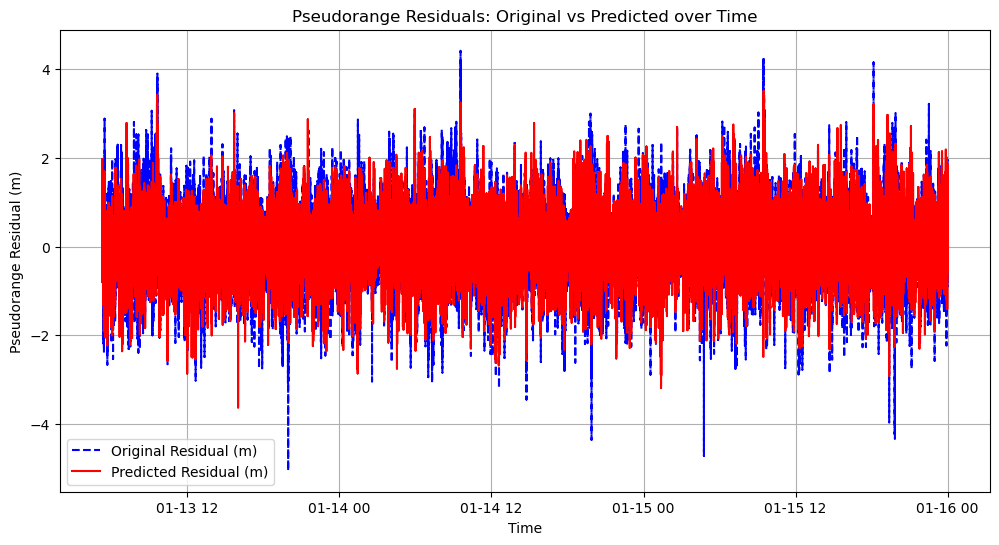

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the FCNN model
fcnn_model = Sequential()
fcnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
fcnn_model.add(Dense(32, activation='relu'))
fcnn_model.add(Dense(1))

# Compile the model
fcnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
fcnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_fcnn = fcnn_model.predict(X_test)

# Calculate RMS for FCNN
a2_fcnn = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
improvement_rate_fcnn = (a1 - a2_fcnn) / a1

print(f'RMS of FCNN: {a2_fcnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_fcnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_fcnn):], y_pred_fcnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# CNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 303us/step - loss: 0.2192
Epoch 2/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 299us/step - loss: 0.2047
Epoch 3/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 300us/step - loss: 0.2030
Epoch 4/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 310us/step - loss: 0.1981
Epoch 5/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 305us/step - loss: 0.1978
Epoch 6/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 305us/step - loss: 0.1965
Epoch 7/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 303us/step - loss: 0.1958
Epoch 8/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 301us/step - loss: 0.1931
Epoch 9/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 303us/step - loss: 0.1943
Epoch 10/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 304us/step - loss: 0.1912
Epoch 11/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 304us/step - loss: 0.1901
Epoch 12/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 301us/step - loss: 0.1907
Epoch 13/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 299us/step - loss: 0.1872
Epoch 14/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 308us/step - loss: 0.1874
Epoch 15/50


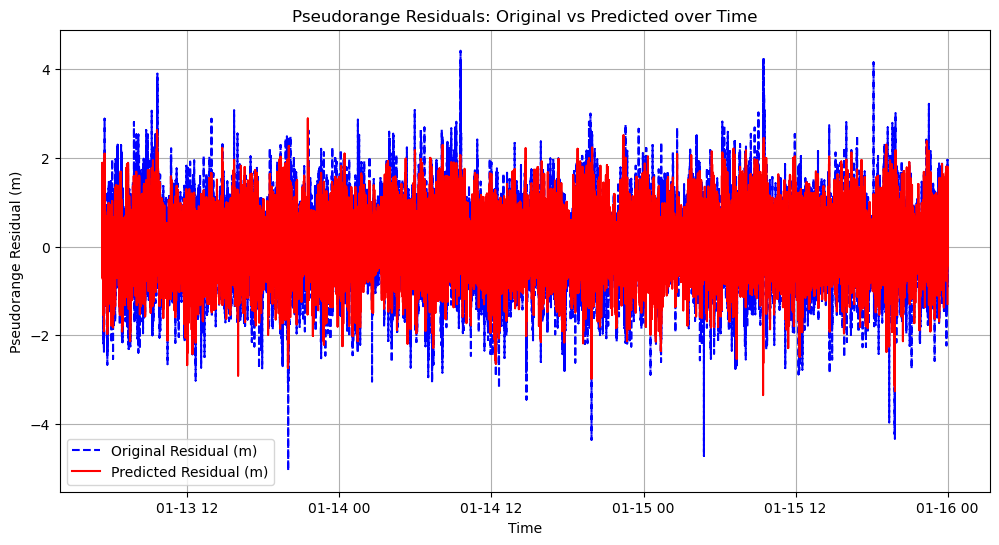

In [4]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Calculate RMS for CNN
a2_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
improvement_rate_cnn = (a1 - a2_cnn) / a1

print(f'RMS of CNN: {a2_cnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_cnn):], y_pred_cnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# RNN/LSTM

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2329
Epoch 2/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2084
Epoch 3/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2031
Epoch 4/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.1998
Epoch 5/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1975
Epoch 6/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1927
Epoch 7/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1867
Epoch 8/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1859
Epoch 9/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1828
Epoch 10/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1792
Epoch 11/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1765
Epoch 12/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1741
Epoch 13/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1718
Epoch 14/50
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1717
Epoch 15/50
8417/8417 ━━━━

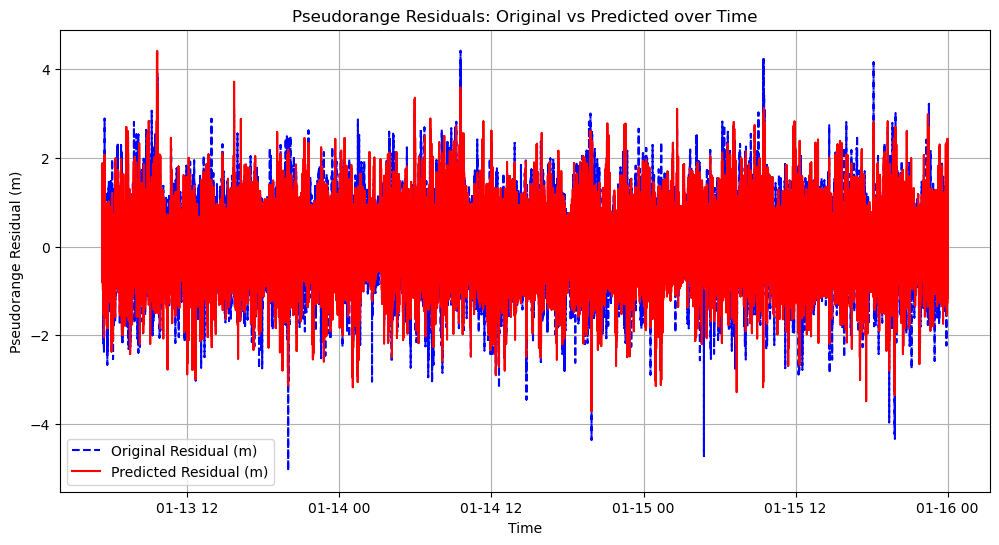

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for LSTM
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# Define the LSTM model
rnn_model = Sequential()
rnn_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(LSTM(50))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Calculate RMS for LSTM
a2_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
improvement_rate_rnn = (a1 - a2_rnn) / a1

print(f'RMS of LSTM: {a2_rnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_rnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_rnn):], y_pred_rnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree Regressor

RMS of Decision Tree: 0.5815 meters
Improvement Rate: 8.45%


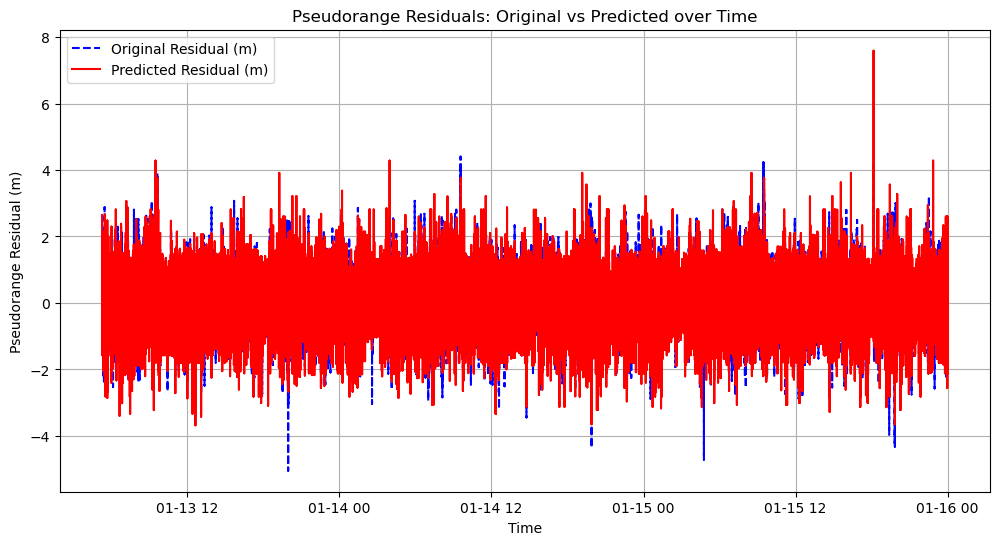

In [6]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting
y_pred_dt = dt_model.predict(X_test)

# Calculate RMS for Decision Tree
a2_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
improvement_rate_dt = (a1 - a2_dt) / a1

print(f'RMS of Decision Tree: {a2_dt:.4f} meters')
print(f'Improvement Rate: {improvement_rate_dt * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_dt):], y_pred_dt, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

RMS of Linear Model: 0.4849 meters
Improvement Rate: 23.66%


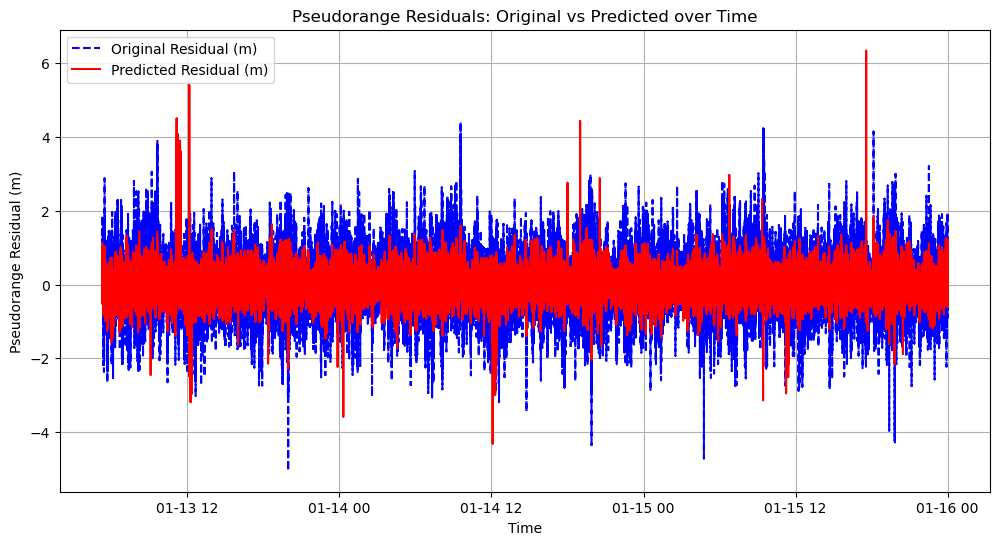

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting
y_pred_linear = linear_model.predict(X_test)

# Calculate RMS for Linear Model
a2_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
improvement_rate_linear = (a1 - a2_linear) / a1

print(f'RMS of Linear Model: {a2_linear:.4f} meters')
print(f'Improvement Rate: {improvement_rate_linear * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_linear):], y_pred_linear, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Support Vector Regression (SVR)

RMS of RBF SVR Model (Downsampled): 0.4501 meters
Improvement Rate: 29.14%


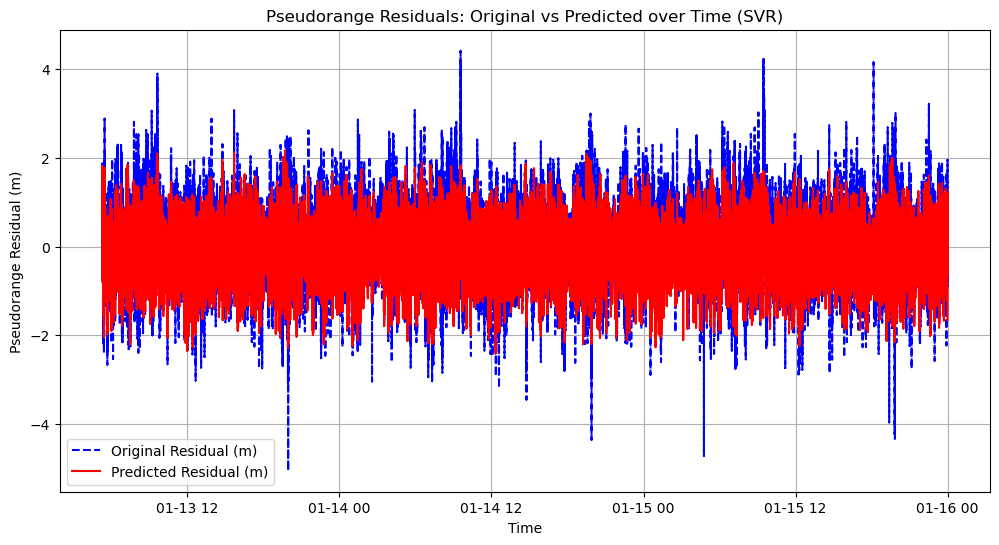

In [8]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Downsample the data (e.g., to 50% of the original data)
X_train_downsampled, y_train_downsampled = resample(X_train, y_train, n_samples=int(len(X_train) * 0.5), random_state=42)

# Scaling the downsampled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model with 'rbf' kernel
svm_model_rbf = SVR(kernel='rbf', cache_size=200, tol=1e-3)
svm_model_rbf.fit(X_train_scaled, y_train_downsampled)

# Predicting
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

# Calculate RMS for SVR with RBF kernel
a2_svm_rbf = np.sqrt(mean_squared_error(y_test, y_pred_svm_rbf))
improvement_rate_svm_rbf = (a1 - a2_svm_rbf) / a1

print(f'RMS of RBF SVR Model (Downsampled): {a2_svm_rbf:.4f} meters')
print(f'Improvement Rate: {improvement_rate_svm_rbf * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_svm_rbf):], y_pred_svm_rbf, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time (SVR)')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to create the CNN model (for KerasRegressor)
def create_cnn(filters=64, kernel_size=2, activation='relu'):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Wrap the model using KerasRegressor from scikeras, passing the default values for filters and kernel_size
cnn_model = KerasRegressor(model=create_cnn, verbose=1)

# Define the parameter grid for tuning
param_grid = {
    'model__filters': [32, 64, 128],  # Pass filters as model__filters
    'model__kernel_size': [2, 3, 4],  # Pass kernel_size as model__kernel_size
    'epochs': [10, 20, 50],           # epochs stays the same
    'batch_size': [32, 64],           # batch_size stays the same
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_cnn, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_cnn_model = grid_search.best_estimator_
y_pred_cnn_tuned = best_cnn_model.predict(X_test_cnn)

# Calculate RMS for the tuned CNN model
a2_cnn_tuned = np.sqrt(mean_squared_error(y_test, y_pred_cnn_tuned))
improvement_rate_cnn_tuned = (a1 - a2_cnn_tuned) / a1

print(f'RMS of Tuned CNN: {a2_cnn_tuned:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn_tuned * 100:.2f}%')


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/10
Epoch 1/10
 124/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 997us/step - loss: 0.2933 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 170/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2841Epoch 1/10
 215/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.2776Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 254/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.2731Epoch 1/10
 397/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2626Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

 418/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2617Epoch 1/10
 692/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2530Epoch 1/10
Epoch 1/10
 727/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2522Epoch 1/10
 955/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2487

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1114/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2470Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2291
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2237
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2246
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2178
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2289
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2225
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2296
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2252
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2320
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2239
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.2243
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.2224
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.2113
Epoch 3/10
5611/5611 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2775/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.6min
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step loss: 0.19190
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19161
4795/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1916[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.7min
Epoch 1/10
3475/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - loss: 0.1910[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.6min
Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5570/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1918[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.6min
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1918
5592/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.18871

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1887
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 953us/step - loss: 0.1911
1910/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.269

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 876us/step - loss: 0.2503[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.6min
Epoch 1/10
 727/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2427[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.6min
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.243
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.240
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.25
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.233
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/stepep - loss: 0.238
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22243
4044/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 0.2324

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4144/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.2322[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.7min
Epoch 1/10
4448/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.2314

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 981us/step - loss: 0.2279
Epoch 2/10
 184/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 830us/step - loss: 0.2135[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.7min
Epoch 1/10
5397/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.2221

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5198/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2211[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.7min
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 980us/step - loss: 0.2216
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.22059
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 923us/step - loss: 0.2288
Epoch 2/10
 738/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.21138

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3724/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2289[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.7min
Epoch 1/10
 623/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2081[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.7min
Epoch 1/10
1028/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2094

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2238
Epoch 2/10
1450/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2441

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 254/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2998[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.8min
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2234
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2111
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2035
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2072
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2042
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2028
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2045 
 526/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 926us/step - loss: 0.2013Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2290
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.2203
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.2239
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.2301
Epoch 2/10
5611/5611 ━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1991
Epoch 8/10
1996/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1909
Epoch 8/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1956
Epoch 8/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19447
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18598
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19556
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19194
1368/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.25393

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1197/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.190393
Epoch 8/10
2360/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.24263

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3560/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - loss: 0.1933[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.283
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1937
Epoch 9/10
 821/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 976us/step - loss: 0.2529

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19180
Epoch 9/10
4511/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1935[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.4min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19147
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19826
Epoch 9/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2306 
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2215
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1919
Epoch 9/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1936
Epoch 9/10
2790/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2344

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4906/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1913[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.4min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19113
Epoch 9/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.22345
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.22763
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19319
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 991us/step - loss: 0.2190
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1889
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2091
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1943
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2048
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1890
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1936
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2235
Epoch 2/2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4528/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2065[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.6min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
4795/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.2066[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.6min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.18896
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 953us/step - loss: 0.2066
Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19
   1/5611 ━━━━━━━━━━━━━━━━━━━━ 1:30:24 967ms/step - loss: 0.3545[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.6min
Epoch 1/20
4694/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1995

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5088/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.19968

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 507/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2071[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.6min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19986
Epoch 5/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2014
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19402
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 877us/step loss: 0.19231
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20064
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19710
Epoch 5/10
2710/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - loss: 0.2370

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4249/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - loss: 0.2236[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.6min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 880us/step - loss: 0.2288
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 947us/step - loss: 0.2047
Epoch 5/20
2534/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2395  

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4109/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 0.2303[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.7min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 966us/step - loss: 0.2206
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 858us/step - loss: 0.1975
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 923us/step - loss: 0.2260
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19991
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 880us/step - loss: 0.1980
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 946us/step - loss: 0.2288
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19521
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 948us/step - loss: 0.2091
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1955 
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 919us/step - loss: 0.2028
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20224
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 961us/step - loss: 0.22

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2193/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - loss: 0.1846[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 900us/step - loss: 0.1968
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 873us/step - loss: 0.1933
Epoch 8/20
3752/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 0.1883[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
 907/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 798us/step - loss: 0.1933

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - loss: 0.191
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 800us/step - loss: 0.1939
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 718us/step - loss: 0.1867
Epoch 13/20
4081/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.1972

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4289/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 0.1914[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.3min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 844us/step - loss: 0.1893
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - loss: 0.1917
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 715us/step - loss: 0.1976
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 849us/step - loss: 0.1956
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 833us/step - loss: 0.1956
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 882us/step - loss: 0.1929
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 942us/step - loss: 0.1864
Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.22890
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 963us/step - loss: 0.1906
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1949
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22066
 585/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2124Epoch

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2011/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.1min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.1871
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step - loss: 0.185
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - loss: 0.1929
Epoch 10/20
5274/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.1858[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.1min
Epoch 1/20
4046/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - loss: 0.1972

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 912us/step - loss: 0.1857
1700/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - loss: 0.1938Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 882us/step - loss: 0.1869
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 882us/step - loss: 0.1970
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 865us/step - loss: 0.1884
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 863us/step - loss: 0.1852
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.1914
Epoch 9/20
3738/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.1855[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.2min
Epoch 1/20
 912/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18162

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 827us/step - loss: 0.1827
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 930us/step - loss: 0.2269
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 988us/step - loss: 0.1919
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 960us/step - loss: 0.1856
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.21892
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 974us/step - loss: 0.1963
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18628
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18458
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.191483
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.19358
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 949us/step - loss: 0.1881
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 963us/step - loss: 0.2092
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18440
5236/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1917Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  41/5611 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.1913[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.0min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 903us/step - loss: 0.1888
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 905us/step - loss: 0.1946
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 901us/step - loss: 0.1852
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 891us/step - loss: 0.2076
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 872us/step - loss: 0.1812
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 903us/step - loss: 0.2025
1792/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1870Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 866us/step - loss: 0.1843
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.204
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20354
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.1931
Epoch 13/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 952us/step - loss: 0.202
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 961us/step - loss:

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18774
Epoch 12/20
1082/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 0.197

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5144/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1878[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.0min
Epoch 1/20
2020/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1936[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.0min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 889us/step - loss: 0.2032
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 887us/step - loss: 0.1879
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 906us/step - loss: 0.1983
2548/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/stepEpoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - loss: 0.209
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 904us/step - loss: 0.2317
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 842us/step - loss: 0.2018
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 829us/step - loss: 0.1930
Epoch 14/20
3567/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 0.2008

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2144/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: 0.2106[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.1min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 885us/step - loss: 0.2008
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 879us/step - loss: 0.1887
Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 842us/step - loss: 0.2188
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 940us/step - loss: 0.1975
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 884us/step - loss: 0.2096
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step loss: 0.23204
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 970us/step - loss: 0.2192
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20068
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.22834
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19494
Epoch 15/20
2732/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19194

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3351/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - loss: 0.2045[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.2min
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 948us/step - loss: 0.1882
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.21886
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19854
Epoch 7/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18974
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20344
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 982us/step - loss: 0.2048
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19346
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20576
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.196945
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 985us/step - loss: 0.1914
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20917
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 874us/step - loss: 0.18

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19498
Epoch 7/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 942us/step - loss: 0.1834
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 958us/step - loss: 0.1926
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 975us/step - loss: 0.1873
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19658
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 942us/step - loss: 0.1832
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.1884
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 862us/step - loss: 0.1949
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 929us/step - loss: 0.1896
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.190677
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 915us/step - loss: 0.1877
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 948us/step - loss: 0.1923
Epoch 8/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 910us/step - loss: 0.1930
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 970us/step - loss: 0.2262
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2323/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1950[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.3min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 909us/step - loss: 0.192
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 973us/step - loss: 0.1919
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - loss: 0.1916
Epoch 11/20
3986/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.1860[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.3min
Epoch 1/20
4177/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.19513

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.2084
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 950us/step - loss: 0.1871
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19511
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 947us/step - loss: 0.1864
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 928us/step - loss: 0.1903
Epoch 17/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 967us/step - loss: 0.1924
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18966
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 982us/step - loss: 0.1868
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.1913
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22008
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.190288
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20634
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.1873
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 991us/step - loss: 0.1884
Epoch 16/20

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.1865
Epoch 17/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 961us/step - loss: 0.1852
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 999us/step - loss: 0.1949
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19385
Epoch 7/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 984us/step - loss: 0.1958
Epoch 7/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19046
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.186362
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18656
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18975
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18085
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1857
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18736
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 985us/step - loss: 0.2259
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18377
5611/5611 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 913us/step - loss: 0.2084
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 956us/step - loss: 0.1862
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 865us/step - loss: 0.1931
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 924us/step - loss: 0.1899
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - loss: 0.1891
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 896us/step - loss: 0.1850
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 870us/step - loss: 0.1887
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 923us/step - loss: 0.1903
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 805us/step - loss: 0.1764
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 795us/step - loss: 0.2050
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 856us/step - loss: 0.2218
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - loss: 0.1914
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step - loss: 0.1933
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - loss: 0.1860
2806/2806

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 903us/step - loss: 0.2017
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.185
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 898us/step - loss: 0.1855
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 991us/step - loss: 0.2049
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 927us/step - loss: 0.1913
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 974us/step - loss: 0.1908
Epoch 13/20
 939/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 970us/step - loss: 0.2446

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 890us/step - loss: 0.1884
Epoch 10/20
 397/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1884[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.1min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.182
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 931us/step - loss: 0.1880
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.1868
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 981us/step - loss: 0.1825
2646/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - loss: 0.1876Epoch 19/20
2450/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - loss: 0.1900[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.0min
Epoch 1/50
1066/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 998us/step - loss: 0.1800

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - loss: 0.1982
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 982us/step - loss: 0.1864
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.22080
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19729
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 986us/step - loss: 0.1902
 383/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 928us/step - loss: 0.1881Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18993
Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.189058
Epoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18432
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 924us/step - loss: 0.2319
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18805
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1859 
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.17213 
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 914us/step - loss: 0.2207
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 766/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - loss: 0.2035[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.1min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.201
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20089
Epoch 3/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19661
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19269
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18890
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18779
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 894us/step - loss: 0.2097
Epoch 3/50
 672/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 955us/step - loss: 0.2696

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4608/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1834[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.2min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18316
4801/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1834Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18351
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 962us/step - loss: 0.2017
Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.196685
Epoch 8/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 835us/step loss: 0.18248
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20035
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18835
Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19441
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 989us/step - loss: 0.2267
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 930us/step - loss: 0.2057
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18841
 985/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1m

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1053/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2057[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.2min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18693
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18540
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 875us/step - loss: 0.2303
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 952us/step - loss: 0.2008
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19392
Epoch 9/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.1979
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 918us/step - loss: 0.1927
Epoch 7/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 942us/step - loss: 0.1905
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 894us/step - loss: 0.2067
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 988us/step0.1958s: 0.1868
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 942us/step - loss: 0.2047
Epoch 5/50
 987/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1925[CV] END batch_size=3

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 964us/step - loss: 0.1889
Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 924us/step - loss: 0.2229
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 956us/step - loss: 0.2090
1392/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - loss: 0.2471Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1915 
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1897 
Epoch 8/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.18927
Epoch 17/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20167
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19424
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1913
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20113
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.2224
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 942us/step - loss: 0.1965
Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - loss: 0.2066
Epoch 4/50
5611/5611 ━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2387/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - loss: 0.1933[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.1min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - loss: 0.1983
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 952us/step - loss: 0.1943
Epoch 8/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.1860
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 875us/step - loss: 0.1933
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18640
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1853 
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19138
2712/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepEpoch 11/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 949us/step - loss: 0.1903
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.1843
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.1986
Epoch 8/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - lo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 988us/step - loss: 0.1938
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19052
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 936us/step - loss: 0.1906
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18808
Epoch 16/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18517
1792/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - loss: 0.1925Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1863
Epoch 12/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1973
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.193004
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1844
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - loss: 0.1904
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20905
Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 889us/step - loss: 0.1959
4128/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.1924Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 816us/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 777us/step - loss: 0.1939
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 838us/step - loss: 0.1927
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.1871
Epoch 17/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18629
Epoch 13/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18531
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 868us/step - loss: 0.1927
Epoch 14/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 894us/step - loss: 0.2042
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 889us/step - loss: 0.2018
Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - loss: 0.1905
Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 851us/step - loss: 0.1885
Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 889us/step - loss: 0.2262
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18580
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19368
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19108
Epoch 11/50

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 918us/step - loss: 0.1887
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 896us/step - loss: 0.1907
Epoch 17/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - loss: 0.1977
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 871us/step - loss: 0.1916
2300/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - loss: 0.1872Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 967us/step - loss: 0.1867
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 941us/step - loss: 0.1902
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 997us/step - loss: 0.1821
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - loss: 0.1832
Epoch 19/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19467
Epoch 8/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.1871
Epoch 16/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 987us/step - loss: 0.1878
Epoch 20/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - loss: 0.1913
Epoch 18/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.23156
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 955us/step - loss: 0.1869
Epoch 20/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 855us/step - loss: 0.1935
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18610
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 926us/step - loss: 0.1883
Epoch 21/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19062
Epoch 17/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 0.2118
Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19063
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - loss: 0.1946
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - loss: 0.1904
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.182798
Epoch 17/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 861us/step - loss: 0.1870
Epoch 21/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 905us/step - loss: 0.1885
Epoch 21/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 898us/step - loss: 0.1918
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 781us/step - loss: 0.1870
Epoch 22/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 958us/step - loss: 0.1913
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 864us/step - loss: 0.1887
Epoch 18/50
[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.1min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18993
 548/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 960us/step - loss: 0.1933Epoch 23/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 923us/step - loss: 0.2062
Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.2025
Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 913us/step - loss: 0.1934
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 963us/step - loss: 0.1897
Epoch 21/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - loss: 0.1877
Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 932us/step - loss: 0.1872
Epoch 23/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 872us/step - loss: 0.1861
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - loss: 0.1863
Epoch 23/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 908us/step

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3446/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1833[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 4.6min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 973us/step - loss: 0.1793
Epoch 30/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 948us/step - loss: 0.1839
Epoch 39/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 899us/step - loss: 0.1795
Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 978us/step - loss: 0.1831
Epoch 48/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - loss: 0.17
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 932us/step - loss: 0.1825
Epoch 48/50
1763/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 991us/step - loss: 0.1833[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 4.7min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 900us/step - loss: 0.1847
Epoch 31/50
3290/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - loss: 0.1807

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 830us/step - loss: 0.1796
Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 889us/step - loss: 0.1776
Epoch 45/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 892us/step - loss: 0.1808
Epoch 39/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - loss: 0.1812
Epoch 31/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 987us/step - loss: 0.2291
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 926us/step - loss: 0.1812
Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 898us/step - loss: 0.1795
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 883us/step - loss: 0.1803
3999/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - loss: 0.1806Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 938us/step - loss: 0.1854
Epoch 32/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 884us/step - loss: 0.1821
Epoch 27/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 964us/step - loss: 0.2179
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 900us/step - loss: 0.1800
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 907us/step - loss: 0.1795
 886/5611 ━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 813us/step - loss: 0.1837
Epoch 42/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 843us/step - loss: 0.1786
Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 976us/step - loss: 0.1821
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20416 
Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18321
Epoch 35/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 935us/step - loss: 0.1779
Epoch 47/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18586
Epoch 30/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18173
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1967
1341/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2018Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.1798
Epoch 43/50
4471/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.17885

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1608/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1800[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 4.9min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17489
Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - loss: 0.1788
Epoch 47/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1842 
   1/5611 ━━━━━━━━━━━━━━━━━━━━ 11:30 123ms/step - loss: 0.3996Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1808
Epoch 34/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.22071
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 807us/step - loss: 0.1769
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20066
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18183
Epoch 36/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 956us/step - loss: 0.1970
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 942us/step - loss: 0.1800
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 924us/step - loss: 0.1796
Epoc

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5603/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.1841[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 5.0min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 950us/step - loss: 0.1841
Epoch 38/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 977us/step - loss: 0.1933
Epoch 8/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - loss: 0.1841
Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - loss: 0.1796
 568/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 984us/step - loss: 0.1903Epoch 37/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 956us/step - loss: 0.2035
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 909us/step - loss: 0.1763
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 945us/step - loss: 0.1976
Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.1825
Epoch 33/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - loss: 0.1797
Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.1962
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 945us/step - loss: 0.1831
Epoch 39/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 955us/step - loss: 0.1828
Epoch 47/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 872us/step - loss: 0.1782
Epoch 38/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 897us/step - loss: 0.2003
Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 969us/step - loss: 0.2196
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 736us/step - loss: 0.1946
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 803us/step - loss: 0.1826
Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 902us/step - loss: 0.1954
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 878us/step - loss: 0.1773
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 867us/step - loss: 0.2240
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 899us/step - loss: 0.1818
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 854us/step - loss: 0.2012
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.1781
4027/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.1800Epoch 39/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20360
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1188/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 883us/step - loss: 0.1821[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 5.2min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 962us/step - loss: 0.1882
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - loss: 0.2052
5377/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.1800Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - loss: 0.1801
Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 944us/step - loss: 0.1985
Epoch 7/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 924us/step - loss: 0.1800
Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.1991
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - loss: 0.1776
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.1923
Epoch 8/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - loss: 0.1821
Epoch 35/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 923us/step - loss: 0.1818
Epoch 42/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18759


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18596
Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1968  
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17921
Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19521
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20812
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1780
Epoch 50/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19464
Epoch 7/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18103
Epoch 38/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19123
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18213
Epoch 45/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.192846
Epoch 14/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 985us/step - loss: 0.1941
Epoch 7/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.21950
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17877
Epoch 44/50
5611/5611

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  24/5611 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1877  [CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 4.9min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17981
Epoch 45/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19150
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 996us/step - loss: 0.1819
Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19100
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20057
3097/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - loss: 0.1907Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1892
Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1842
Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1871
Epoch 15/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19165
Epoch 16/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 991us/step - loss: 0.1910
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19928
Epoch 4/5

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3261/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1816[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 5.0min
Epoch 1/50
 668/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1958[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 4.9min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1956
Epoch 7/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18227
Epoch 16/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1806
2403/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1990Epoch 20/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1873
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18586
1189/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2369Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1809
Epoch 47/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1892
Epoch 10/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18773
Epoch 22/5

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2268/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1850[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 5.3min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20130
Epoch 6/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18080
Epoch 25/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.19201
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18521
Epoch 27/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1856
Epoch 15/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1915
Epoch 18/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1829
Epoch 25/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1816
Epoch 21/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18454
Epoch 25/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19643
Epoch 7/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1799 
 687/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 969us/step - loss: 0.1829Epoch 22/50
56

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2951/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1778[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 5.6min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17318
Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18286
Epoch 25/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18327
Epoch 41/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17766
 721/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1815Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17366
Epoch 50/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18145
Epoch 31/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17720
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17855
Epoch 39/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 985us/step - loss: 0.1754
1505/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1833Epoch 47/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1849
Epoch 32/50
5611/5611 ━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 468/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1814[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 5.3min
Epoch 1/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2276
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1841
Epoch 42/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1792
Epoch 50/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1726
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1825
Epoch 32/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1738 
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1833
Epoch 33/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17606
Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17955
Epoch 37/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1826
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1704
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1833
Epoch 27/50
2746/5611 ━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2097
5388/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1776Epoch 3/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1776
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1827
Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18198
Epoch 33/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.22078
Epoch 2/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17408
Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18154
Epoch 34/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1756
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1804
Epoch 41/50
Epoch 38/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1698
Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1827 
Epoch 28/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20313
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18302
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/ste

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18202
Epoch 35/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1724   
Epoch 50/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17860
Epoch 42/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18000
Epoch 29/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.20121
Epoch 5/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - loss: 0.1728
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1810
Epoch 39/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.23344
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18484
Epoch 45/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1826
Epoch 35/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2010
Epoch 4/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1814
Epoch 36/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1715
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step loss: 0.195
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - los

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1786
Epoch 30/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19933
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20781
Epoch 4/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17953
Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1805
Epoch 36/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1840
2387/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2055Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19657
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2226
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18175
2440/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1797Epoch 37/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2081 
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 978us/step loss: 0.18299
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1755
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.202

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2383/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1850[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 5.6min
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20450
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1806 
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2029
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19821
Epoch 7/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18092
Epoch 41/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1812
Epoch 37/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18431
Epoch 47/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19317
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20092
Epoch 4/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1837
Epoch 38/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2023
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22852
2815/56

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1936
Epoch 7/50
1878/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1968[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  35.3s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1967
Epoch 7/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1944
Epoch 10/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1948
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1771
4727/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1762Epoch 40/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17975
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17819
Epoch 41/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19198
Epoch 9/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18231
Epoch 50/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1761
Epoch 47/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1977
Epoch 8/10
5611/5611 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 211/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1968[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  35.3s
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19079
Epoch 11/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17839
Epoch 41/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17829
Epoch 42/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1797
Epoch 45/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18900
Epoch 10/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 963us/step - loss: 0.2100
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1742
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1819
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19440
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1802
Epoch 35/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step loss: 0.199
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1914
Epoch 9/50
2806/2806 ━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1881
Epoch 12/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1794
Epoch 42/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1798
Epoch 43/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.171
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1864 
Epoch 11/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2019
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1796
Epoch 46/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2025
Epoch 5/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17552
Epoch 49/50
4933/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.18210

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 973/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 0.2460[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  37.2s
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18198
Epoch 36/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 983us/step - loss: 0.2253
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.19161
Epoch 10/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1998
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 979us/step - loss: 0.2014
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18966
Epoch 13/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17854
Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1795
Epoch 44/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2353
Epoch 2/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2041
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2001
Epoch 5/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1872
Epoch

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2679/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2031[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 6.0min
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20311
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1852 
Epoch 14/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1984
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1780
Epoch 39/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1935
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1884
Epoch 15/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1798
Epoch 45/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19550
Epoch 8/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18791
Epoch 13/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20271
Epoch 7/10
5416/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1803

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5482/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1803[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  39.6s
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1802
Epoch 49/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2279  
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18006
Epoch 47/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19107
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19366
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20153
Epoch 8/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18313
Epoch 15/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20290
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.227508
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18750
Epoch 16/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step loss: 0.1782 
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1779
4279/5611 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4371/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1778[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  37.0s
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1765
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2013
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2061
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1782
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1797
Epoch 40/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1909
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1975 6
Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1867
Epoch 16/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19679
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2013
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.23001
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18733
 386/2806 ━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1778
Epoch 49/50
  45/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1577   [CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  37.4s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step - loss: 0.2097
Epoch 3/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.174
 839/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.2034[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  36.5s
Epoch 1/10
3201/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - loss: 0.1765

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18296
Epoch 17/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.24679
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19674
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20459
Epoch 4/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17739
Epoch 48/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18714
Epoch 18/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 940us/step - loss: 0.1792
Epoch 41/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 853us/step - loss: 0.1947
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2229
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1863
Epoch 16/50
 467/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2054[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 6.1min
Epoch 1/10
 517/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19146

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22257
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17857
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20427
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19386
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 978us/step - loss: 0.1967
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20476
  82/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 0.1914 Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18412
Epoch 18/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20481
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1999
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22961
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1783 
Epoch 49/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1913
Epoch 9/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1856
Epoch 19/50
5611/5611 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19479
 131/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1804Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17759
Epoch 43/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18278
Epoch 18/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19918
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19688
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19588
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 9s 999us/step - loss: 0.1788
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19095
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step loss: 0.19205
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22245
Epoch 2/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18164
Epoch 20/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 918us/step - loss: 0.2047
Epoch 5/10
 659/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1997

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 982/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  38.0s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2002
Epoch 7/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.190
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1965
Epoch 10/10
1940/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2011

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1846
Epoch 21/50
1746/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1813[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  35.8s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1959
Epoch 7/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1792
Epoch 44/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1851 
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2012
 821/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1860Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2018
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19621
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19332
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1774 
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22226
Epoch 2/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step loss: 0.238
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - lo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3671/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1810[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  34.5s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19591
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19507
Epoch 9/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18489
Epoch 22/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17839
Epoch 45/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20539
2369/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2100Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.181490
Epoch 20/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20998
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step - loss: 0.1975
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1987 
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20191
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19411
Epoch 9/10
2806/2806 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   1/2806 ━━━━━━━━━━━━━━━━━━━━ 2:44 58ms/step - loss: 0.2977[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 5.9min
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19327
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.200174
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20748
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1965
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1810
Epoch 22/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1952
 933/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1999Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1930
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2014
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1846
Epoch 23/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1779
Epoch 46/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1806
Epoch 21/50
2806/28

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19517
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20207
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18127
Epoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.192277
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19437
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 883us/step - loss: 0.1980
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2060
4206/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1830Epoch 3/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.18810
4810/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.17869

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1599/5611 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1783[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  41.1s
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1799 
Epoch 22/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1831
1697/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2001Epoch 24/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1785
Epoch 47/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1941
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1990
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19108
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22878
Epoch 2/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19911
Epoch 5/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step loss: 0.1984 
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2042
Epoch 4/10
1352/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1920[CV] END batch_size=64, epochs=10, m

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1929
Epoch 8/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1797
Epoch 24/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1969
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2203
Epoch 2/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19143
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2100 
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1992
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1992 
Epoch 5/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1809
5257/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1756Epoch 23/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1810 
Epoch 25/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1757
Epoch 48/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1934
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1972
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1793
Epoch 25/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1968
Epoch 10/10
3802/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1792[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  36.4s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1949
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2016
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1956
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2062
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2057
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1795
Epoch 24/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17764
Epoch 49/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18314
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19084
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1950 
Epoch 9/10
2806/2806 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2729/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1795[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  38.4s
Epoch 1/10
3703/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1781

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1907
1859/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1992Epoch 10/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1815
Epoch 26/50
3467/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1792[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  37.8s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2018
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1995
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1981
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2080
 251/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1937Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1942
Epoch 9/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1787 
Epoch 25/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1831
Epoch 27/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1787
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1815/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2046[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  41.3s
Epoch 1/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1933
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1953
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1981
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1955
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2021
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2041
Epoch 5/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1792
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2048
Epoch 3/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1763
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.203
2061/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.186

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3847/5611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1803[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  41.1s
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1834
Epoch 28/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1919
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1966
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1935
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2010
  58/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1930Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2020
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2268
Epoch 2/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2021
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step0.19oss: 0.195
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1802
Epoch 28/50
 876/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1995

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 969/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1995[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 6.0min
Epoch 1/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1780
Epoch 27/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2017
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1904
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1956
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1967
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2098
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1957
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1993
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2185
Epoch 2/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17402
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1814
Epoch 29/50
2158/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2272

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1662/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2032[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  43.2s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2240
Epoch 2/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2052
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1988
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1909
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1970
Epoch 6/10
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1766
Epoch 29/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1937
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1974
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2029
Epoch 3/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.184
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1794
Epoch 28/50
1752/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1977

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2346/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2051[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  44.8s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2031
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2050
Epoch 3/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19574
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1927
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1975
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2000
Epoch 4/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1925
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2304
Epoch 2/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18263
Epoch 30/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.20386
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22072
Epoch 2/20
5558/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.18022

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1802
Epoch 30/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20162
1186/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.2120Epoch 4/10
[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  45.8s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19551
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1931 
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2003
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1943
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2011
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2115
 745/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1908Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2041
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1967
Epoch 5/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1918
2806/2806 ━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  44.5s
Epoch 1/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1799
1593/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1753Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1962
Epoch 6/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1978
Epoch 8/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1940
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1926
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1922
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2062
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2023
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19894
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1961
Epoch 7/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1907
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1931
2380/2806 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2044/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2091[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  44.8s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1948
Epoch 8/10
2765/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1931

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1930
Epoch 9/10
2689/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2087[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  46.3s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2086
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2003
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2013
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1945
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1963  
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1890
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19161
Epoch 9/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20651
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17771
Epoch 31/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17811
Epoch 33/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1942
2806/2806

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2608/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1906[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  43.5s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1904
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1904
Epoch 10/10
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2027
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1977
Epoch 9/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20437
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19202
Epoch 9/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.20265
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19867
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20236
Epoch 3/20
4650/5611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1796 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2285/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1884[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  41.8s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1887
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2002
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1787
Epoch 32/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1797
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2375
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1987
Epoch 10/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20160
Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19325
Epoch 10/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step - loss: 0.1970
Epoch 8/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20175
Epoch 4/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17818
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step - loss: 0.1994
Epoch 7/20
2806/2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 136/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1847[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  44.6s
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 877us/step - loss: 0.1994
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20406
Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19886
Epoch 8/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17766
Epoch 33/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17933
Epoch 35/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19786
Epoch 12/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 988us/step - loss: 0.2034
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19227
Epoch 12/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1946
Epoch 10/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1980
Epoch 6/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17624
Epoch 35/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step - loss: 0.1972 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - loss: 0.1893
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 945us/step - loss: 0.1897
Epoch 14/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - loss: 0.1907
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 905us/step - loss: 0.1942
Epoch 11/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step - loss: 0.19415
Epoch 14/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17664
Epoch 38/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 977us/step - loss: 0.1772
Epoch 40/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - loss: 0.1895
Epoch 13/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 976us/step - loss: 0.1904
Epoch 15/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 0.185
2280/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.19183

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1940/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2383[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=2; total time= 1.2min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 942us/step - loss: 0.1883
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19157
Epoch 15/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 0.1919
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.233226
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19311
Epoch 12/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 967us/step - loss: 0.1925
Epoch 15/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - loss: 0.1876
Epoch 16/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1900
Epoch 14/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1924 
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1901
Epoch 16/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18983
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22193
Epoch 2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18981
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18881
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step - loss: 0.1909
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20324
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20734
 340/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1962Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18864
Epoch 16/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18884
Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 10s 932us/step - loss: 0.1746
Epoch 39/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.183
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 985us/step - loss: 0.1928
Epoch 14/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22386
Epoch 2/20
 184/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1997[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.1min
Epoch 1/20
2070/2806 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18909
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.199293
Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20379
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18779
Epoch 17/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1752
Epoch 41/50
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17879
Epoch 42/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18766
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 918us/step - loss: 0.1893
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20439
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19020
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20280
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22947
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18850
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2005
Epoch 6/20
2806/2806 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 602/1403 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19787
Epoch 8/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17518
Epoch 41/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18768
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19286
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19816
Epoch 6/20
2288/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.20023

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2330/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2002[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 947us/step - loss: 0.1890
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2006
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 956us/step - loss: 0.1868
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19674
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.196462
Epoch 8/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17654
Epoch 43/50
 211/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/20
5487/5611 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.175370

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17537
Epoch 44/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19768
 154/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2943Epoch 9/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step loss: 0.19582
1098/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1923[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/20
 670/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19352

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 996us/step - loss: 0.2203
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1972 4
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19898
Epoch 6/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19348
Epoch 9/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22408
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19558
Epoch 10/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17468
Epoch 42/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22728
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 925us/step - loss: 0.1887
1459/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2034Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2015
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19538
Epoch 8/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2250
 402/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - loss: 0.1973Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/st

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1942
Epoch 13/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2016
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step - loss: 0.1973
Epoch 6/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1903
Epoch 12/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 951us/step - loss: 0.1947
Epoch 10/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19679
Epoch 6/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19629
Epoch 5/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1757
Epoch 44/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1999
Epoch 6/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1911
Epoch 14/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19512
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2269
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1867
Epoch 13/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1915
Epoch 11/20
2806/2806 ━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 602/5611 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1729[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18608
Epoch 13/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19439
Epoch 10/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1892
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1872
Epoch 15/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1865
Epoch 15/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1772
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1882
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1885
Epoch 15/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18701
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1835 
Epoch 14/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1917
Epoch 11/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1861
Epoch 16/20
2806/2806 ━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18562
Epoch 15/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18986
Epoch 12/20
 209/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1771[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/20
  93/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1989s: 0.17786

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18525
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 965us/step - loss: 0.1859
2125/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.1865Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18866
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1866 
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2090
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1886
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1827 
Epoch 16/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1906
Epoch 13/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17472
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18673
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1842
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22082
Epoch 2/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.18483
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17464
Epoch 50/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2185/5611 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1745[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18285
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1860
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18845
Epoch 14/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20632
Epoch 4/20
 611/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2044[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/20
1426/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2085

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1847
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1847
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2065
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1889
1250/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1829Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1826
1266/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1829Epoch 18/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1743
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1865
Epoch 15/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2295
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2047
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2042
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1836
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1831
Epoch 20/20
5611/5611 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17433
28

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1379/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2088[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 5.8min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18210
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18409
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20899
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1888 
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2058
Epoch 3/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1781
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19978
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2076 
Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18790
 840/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 0.2006Epoch 17/20
 135/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1937[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/20
1594/2806 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

 764/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1985[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2024
1772/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1810Epoch 5/20
 400/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1956[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 5.7min
Epoch 1/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.19888
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19898
Epoch 7/20
1334/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1889

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1813
1433/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1889[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2007
Epoch 4/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1973
Epoch 6/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1879
Epoch 18/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.241
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2012
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.22217
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1976
Epoch 6/20
1212/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2359

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2545/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1982[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1981
Epoch 8/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2222
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1862
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1973
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2260
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2273
Epoch 2/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2296
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.19581
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2021
Epoch 6/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2029
Epoch 3/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1971
Epoch 7/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1959
Epoch 9/20
2806/28

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.19434
Epoch 9/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.20184
Epoch 4/50
 761/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - loss: 0.1951[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1977
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1966
Epoch 11/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2028
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1927
Epoch 8/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1986
Epoch 5/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2038
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1910
Epoch 10/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19629
Epoch 9/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1977 
1739/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1962Epoch 6/20
2806/2806 ━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  50/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1905    [CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.6min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18432
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19261
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.18601
Epoch 16/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18501
Epoch 16/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1847
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1862
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1922
Epoch 15/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18385
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1836
Epoch 17/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1849
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1888
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1839
Epoch 20/20

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1111/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1869[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.6min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1833
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1850
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1886
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1885
Epoch 21/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1826
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2108
1197/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1828Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1845
Epoch 21/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2607
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18487
Epoch 18/20
2603/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1847 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19072
Epoch 17/50
   1/2806 ━━━━━━━━━━━━━━━━━━━━ 1:35 34ms/step - loss: 0.1536[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.6min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18481
Epoch 18/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1827 
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1836
1344/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1872Epoch 19/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1891
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22490
1699/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1874Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18950
Epoch 22/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18311
Epoch 22/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20641 
Epoch 4/50
2595/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1855[CV] END batch_size=64, epochs=20, mod

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1855 
Epoch 19/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1885
Epoch 18/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1870
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22952
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18117
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18371
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1830
Epoch 19/20
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2034
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20149
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18245
Epoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20358
Epoch 5/50
2350/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.18709

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1033/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1789[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.6min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2315
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19029
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1872 
Epoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18358
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20378
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18027
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1806
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1987
1773/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1902Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1858
Epoch 20/20
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1818
Epoch 24/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20334
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20214
Epoch 4/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.185
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18138
2723/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1962

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.22676
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 0.1962
Epoch 5/50
   1/2806 ━━━━━━━━━━━━━━━━━━━━ 1:47 38ms/step - loss: 0.2404[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.5min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step - loss: 0.1846
Epoch 25/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20138 
Epoch 7/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20633
Epoch 4/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.273988
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - loss: 0.1901
1224/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 0.1968Epoch 21/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 954us/step - loss: 0.1838
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19812
Epoch 5/50
1039/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1973[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.6min
Epoch

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step - loss: 0.2025
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 947us/step - loss: 0.1813
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.196320
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 803us/step - loss: 0.1859
Epoch 25/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.23201
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - loss: 0.1911
Epoch 22/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 971us/step - loss: 0.1981
Epoch 8/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - loss: 0.2026
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 920us/step - loss: 0.2298
Epoch 2/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.183
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - loss: 0.1831
Epoch 27/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - loss: 0.2008
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - loss: 0.1936
Epoch 7/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - loss: 0.1864
Epoch 26/50
2806/2806 ━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - loss: 0.2042
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 915us/step - loss: 0.1899
Epoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20018
Epoch 9/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 880us/step - loss: 0.1987
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19687
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18233
Epoch 28/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1868 
Epoch 27/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19453
Epoch 8/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19846
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2051
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20126
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2118
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18959
Epoch 24/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.19451
Epoch 7/50
2806/2806 ━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18188
Epoch 29/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18633
Epoch 27/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18111
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18300
Epoch 25/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18339
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18153
2551/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1871Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18699
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 926us/step - loss: 0.1835
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18159
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18088
2292/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2340Epoch 32/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2315
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 902us/step - loss: 0.1885
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - l

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 629/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.1830[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 3.1min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18544
Epoch 35/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2125
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18104
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18662
Epoch 29/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 939us/step - loss: 0.1846
Epoch 27/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.18541
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18221
2317/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1839Epoch 27/50
1071/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2055[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 2.8min
Epoch 1/50
 881/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.18263

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18408
Epoch 33/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step - loss: 0.1796
Epoch 33/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step - loss: 0.1818
Epoch 33/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 943us/step - loss: 0.1813
Epoch 32/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 996us/step - loss: 0.2064
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18609
Epoch 36/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 943us/step - loss: 0.2187
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.183229
Epoch 30/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18257
Epoch 28/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 915us/step - loss: 0.1803
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18102
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step - loss: 0.1821
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22671
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18212
Epoch 33/50
2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - loss: 0.1895
Epoch 21/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - loss: 0.1791
Epoch 48/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step loss: 0.18178
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 908us/step - loss: 0.1784
Epoch 44/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - loss: 0.1768
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.185
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 838us/step - loss: 0.1872
Epoch 18/50
1569/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.1868

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 369/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - loss: 0.2693[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.8min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - loss: 0.1781
Epoch 45/50
1814/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.1867

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2512/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.1866[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.8min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.18076
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 850us/step - loss: 0.1793
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 964us/step - loss: 0.1867
Epoch 22/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17189
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - loss: 0.1866
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 961us/step - loss: 0.1792
Epoch 49/50
2634/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.1797

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - loss: 0.1797
Epoch 45/50
1390/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 0.1800[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 2.9min
Epoch 1/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 0.180
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 898us/step - loss: 0.2295
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 953us/step - loss: 0.1858
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - loss: 0.1809
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step - loss: 0.1780
Epoch 46/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - loss: 0.1874
   1/1403 ━━━━━━━━━━━━━━━━━━━━ 1:16 55ms/stepEpoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 831us/step - loss: 0.2229
Epoch 2/50
 318/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - loss: 0.1821[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.7min
Epoch 1/50
   1/2806 ━━━━━━━━━━━━━━━━━━━━ 1:28 32ms/step - loss: 0.1605: 0.2107

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - loss: 0.1852
Epoch 20/50
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step loss: 0.24977
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 926us/step - loss: 0.2238
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.21008
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1840
Epoch 20/50
1215/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.23313

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 2.9min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1873
Epoch 24/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1781
Epoch 47/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2014
1352/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2051Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1793
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1847
Epoch 21/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2306
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1783
Epoch 46/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2220
Epoch 2/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20685
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20572
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1860
Epoch 25/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1772
1372/2806 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 451/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1792[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 2.9min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1778
Epoch 49/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1867
1353/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2052Epoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.18452
2308/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1975Epoch 22/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20083
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1778
Epoch 48/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2060
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1975
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2002
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2013 
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2050
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2022
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1831
Epoch 29/50
1914/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1979[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 3.0min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.21215
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19840
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1974
   1/2806 ━━━━━━━━━━━━━━━━━━━━ 1:10 25ms/step - loss: 0.2037Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1828  
 182/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2064Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1938
Epoch 8/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1948
Epoch 9/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1911
Epoch 8/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.18282
Epoch 25/50
2806/2806 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1712/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2025[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 3.1min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1829
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1913
Epoch 9/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2011
Epoch 8/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1837
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1934
Epoch 10/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2048
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1931
Epoch 11/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1823
Epoch 28/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1928
Epoch 8/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1950
 934/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1898Epoch 7/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20484
Epoch 3/50
2806/2806 ━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 984/2806 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1816[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.1min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1817
Epoch 30/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1859
Epoch 23/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1877
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.17879
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1815
Epoch 32/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1785
Epoch 49/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1760
2757/2806 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1894Epoch 47/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1821
Epoch 21/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1893
Epoch 19/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1802
 210/2806 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1772Epoch 33/50
2806/2806 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1878/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1753[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.2min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1827
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2054
Epoch 4/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1758
Epoch 50/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1764
Epoch 34/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1797
Epoch 36/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1798
Epoch 29/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1849
Epoch 22/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1837
Epoch 24/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1808 
Epoch 36/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1828
Epoch 28/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2032
Epoch 5/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1855
Epoch 30/5

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1828/2806 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1863[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.3min
Epoch 1/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1830
Epoch 29/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2017
Epoch 6/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1875
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1786
Epoch 38/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1792
Epoch 36/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1854
Epoch 28/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1797
Epoch 38/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1794
Epoch 31/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2002
Epoch 3/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1833
Epoch 24/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1794
Epoch 26/50
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1778
Epoch 39/50

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 343us/step - loss: 0.2209
Epoch 2/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 326us/step - loss: 0.2051
Epoch 3/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 340us/step - loss: 0.2018
Epoch 4/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 340us/step - loss: 0.1972
Epoch 5/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 323us/step - loss: 0.1952
Epoch 6/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 327us/step - loss: 0.1928
Epoch 7/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 336us/step - loss: 0.1925
Epoch 8/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 343us/step - loss: 0.1903
Epoch 9/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 338us/step - loss: 0.1878
Epoch 10/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 331us/step - loss: 0.1888
Epoch 11/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 341us/step - loss: 0.1873
Epoch 12/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 341us/step - loss: 0.1874
Epoch 13/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 340us/step - loss: 0.1855
Epoch 14/20
8417/8417 ━━━━━━━━━━━━━━━━━━━━ 3s 347us/step - loss: 0.1852
Epoch 15/20
